# 分析「下一代幸福聯盟」與「台灣同志諮詢熱線協會」這兩個對立的社會團體公開發表的新聞稿



## 目的
* 分析其新聞稿最常用的字詞與該團體所主張的價值是否相符
* 觀察個別新聞稿最常用的字詞與新聞稿標題對應的關係
* 了解了解兩個對立的團體載新聞稿中最常用的字詞是否有所對立

## 觀察總結
1.
* 「台灣同志諮詢熱線協會」在最近一年當中不斷的在做婚姻平權民法修法的倡議，所以可以看到使用度最高的為'民法'二字，比較特別的是'青少年'排行在最常使用的字詞中的第六名，可以推測該團體可能花蠻多心力在輔導迷惘的青少年探索與認識自己的性向。
* 「下一代幸福聯盟」所最常使用的字詞 '家庭'與'社會' 使用次數旗鼓相當，可見其對於社會上家庭的定義根深蒂固的想法，可能認為婚姻平權法案的通過會影響社會中家庭的組成，同時該團體可能也相當關注同性婚姻對於子女的影響，這一觀察可以從最常使用的第四個字詞看出來

2.
* 「台灣同志諮詢熱線協會」的第二篇新聞稿是'同志伴侶與家庭會見總統 聯合說明稿'，經過TF-IDF分析，可以看出'平權'為最重要的字詞相對其他4個字，也相對於其他新聞稿，從該現象可以了解該團體與總統會面時，是以"平權"為主要訴求

3.

* 從以上兩張常用字詞難以看出兩個對立團體之間其所主張價值的衝突關係，以主張婚姻平權的「台灣同志諮詢熱線協會」，來看與其對立反對多元成家的「下一代幸福聯盟」所最常使用的字詞，可以了解幸福盟想反對的可能是改變社會上一男一女婚姻及家庭的定義，與同性婚姻通過後對於子女的影響




In [2]:
% matplotlib inline
import numpy as np
import pandas as pd
import json

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
import jieba
import jieba.analyse
import requests
from bs4 import BeautifulSoup
import facebook
from collections import Counter
from PIL import Image

# ----------下一代幸福聯盟-------------




## 我從網路上擷取近一年當中幸福盟在網上所發表的7篇重要的新聞稿

* 經過字頻分析後，得知有些字詞不在詞庫，所以另外加入一些字詞，有些字詞會干擾分析，則與以刪除


In [46]:

doc = []
stopwords = ['我', '對', '\n', '的', '與','及', '在', '讓', '也', '於','時','之','號']
puncs = '\/！？｡＂＃＄％＆＇[ ,，()（）#%\n＊＋，《－／?/ ：&_=-；＜＝ ]＞＠［＼］＾「！＿.｀｛。｜" :｝～」｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。0 1 2 3 4 5 6 7 8 9 zxcvbnmasdfghjklqwertyuiopZXCVBNMASDFGHJKLQWERTYUIOP'
puncs = [x for x in puncs]
jieba.del_word('我們')
jieba.del_word('可以')
jieba.del_word('許多')
jieba.add_word('性行為') 
jieba.add_word('性別教育')
jieba.add_word('同性別二人')  
jieba.add_word('同性二人')  
jieba.add_word('永久共同生活')
jieba.add_word('安定力量')
jieba.add_word('言詞辯論')
jieba.add_word('同性戀者')
#讀取先前存下來的POST檔案
for i in range(7):
    posts = []
    filename = str(i)+".txt"
    f = open(filename, 'r')
    x = f.readlines()
    posts.append(x)
    
    
    flat_list = [item for sublist in posts for item in sublist]  # List of List to list 
    demo_text = ''.join(flat_list) # 將 list of string 轉變成一個大字串
    
    
    #濾除英文、標點符號、數字
    textx = ''
    for i in demo_text:
        if i not in puncs:
            textx = textx + i 
 
    doc.append(textx)
    doc = [" ".join(jieba.cut(article)) for article in doc ] #斷詞斷句
    



In [47]:
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
# tfidf
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(doc)

In [54]:
words = vectorizer.get_feature_names()

## 6篇重要的新聞稿經過Tfidf演算法計算後的分析結果如下
## 另外還有1篇是集合所有新聞稿所做的字頻分析



In [51]:
# check each document
# 
title = ['反同團體所有文章','尊重同志，反對同運','反對同性婚姻入法6項理由','同性婚姻對孩童的影響','同性婚姻與多人婚姻','同性婚姻提案理由分析','同性性行為與愛滋']
for i in range(len(doc)):
    #print('----Document {0}----'.format(i))
    print('-------------------------'+title[i])
    for j in range(len(words)-1):
        if tfidf[i,j] > 0.16:
              print(words[j], tfidf[i,j], i ,j)

-------------------------反同團體所有文章
同性 0.384843905966 0 421
婚姻 0.418517747738 0 549
子女 0.198002678462 0 558
家庭 0.223569232445 0 586
社會 0.201757600011 0 1209
-------------------------尊重同志，反對同運
制度 0.191009095873 1 321
同性 0.173058202761 1 421
同性戀者 0.350183342435 1 422
婚姻 0.173058202761 1 549
引起 0.167436004615 1 686
法案 0.167436004615 1 1050
社會 0.224190749235 1 1209
-------------------------反對同性婚姻入法6項理由
同性 0.3652279552 2 421
婚姻 0.466680164978 2 549
社會 0.183998823415 2 1209
-------------------------同性婚姻對孩童的影響
同志 0.462756389355 3 420
子女 0.343761889235 3 558
孩子 0.162144662674 3 560
家庭 0.458787987839 3 586
父母 0.182743496566 3 1103
研究 0.228429370708 3 1198
結構 0.160345037315 3 1270
-------------------------同性婚姻與多人婚姻
同志 0.162181694059 4 420
同性 0.26968922603 4 421
婚姻 0.367758035495 4 549
結婚 0.414464329261 4 1265
運動 0.166044928247 4 1480
-------------------------同性婚姻提案理由分析
同性 0.351975628514 5 421
回應 0.167983491515 5 449
婚姻 0.363708149465 5 549
家庭 0.186188531368 5 586
社會 0.172889350556 5 1209
聯合國 0.325

## 將上面得到的分析結果視覺化

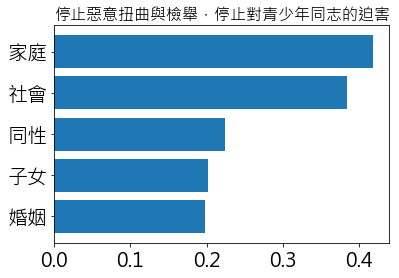

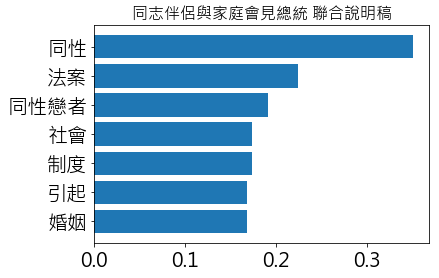

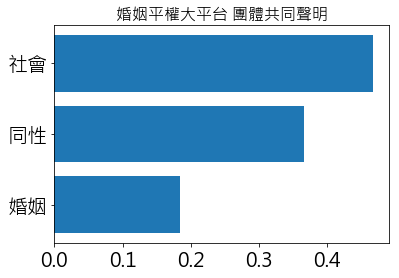

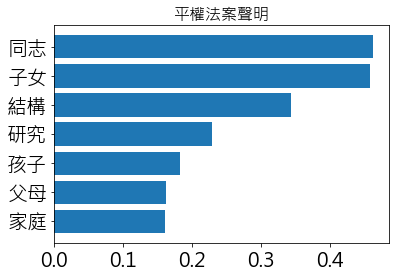

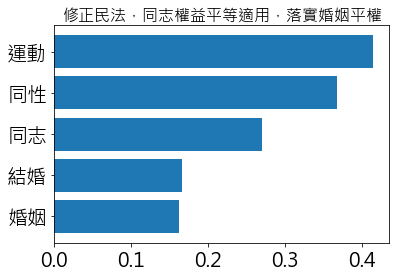

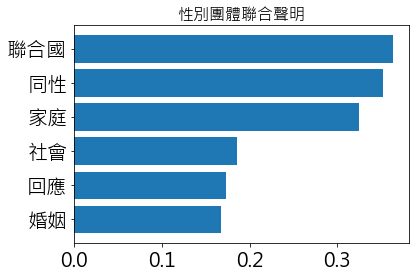

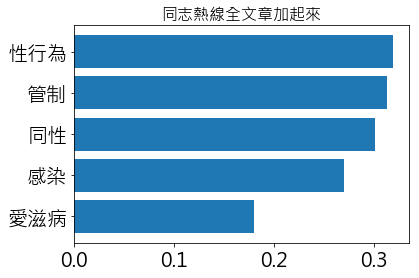

In [58]:

from collections import OrderedDict
matplotlib.rcParams['font.sans-serif'] = 'Microsoft JhengHei'
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 


for i in range(len(doc)):
    d = {}
    for j in range(len(words)-1):
        if tfidf[i,j] > 0.16:
            d[words[j]] = tfidf[i,j]
    dd = OrderedDict(sorted(d.items(), key=lambda x: x[1])) #常用字詞詞頻的排序
    
    #資料劃出橫式直方圖
    X = np.arange(len(d))
    plt.title(title[i], fontsize=16)
    plt.barh(X, dd.values(), align='center')
    plt.yticks(X, d.keys())
    plt.show()


# 在做詞頻視覺化的時候碰到的中文字顯示不出來的bug,  花了一段時間，最終是藉由修改matplotlib檔案內字體詞庫與另外在程式上做設定才幾解決問題

## "下一代幸福聯盟"所有新聞稿加總後的字頻視覺化

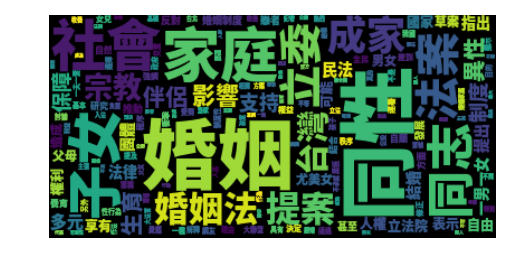

In [38]:
d = {}
for j in range(len(words)-1):
    d[words[j]] = tfidf[0,j]

font = r"D:/dsc-crawling-master/Session_B/data/NotoSansCJKtc-Black.otf"
wordcloud = WordCloud(font_path=font)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure( figsize=(8,6) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# ----------台灣同志諮詢熱線協會-------------

In [39]:

doc = []
stopwords = ['我', '對', '\n', '的', '與','及', '在', '讓', '也', '於','時','之','號']
puncs = '\/！？｡＂＃＄％＆＇[ ,，()（）#%\n＊＋，《－／?/ ：&_=-；＜＝ ]＞＠［＼］＾「！＿.｀｛。｜" :｝～」｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。0 1 2 3 4 5 6 7 8 9 zxcvbnmasdfghjklqwertyuiopZXCVBNMASDFGHJKLQWERTYUIOP'
puncs = [x for x in puncs]
jieba.del_word('我們')
jieba.del_word('可以')
jieba.del_word('許多')
jieba.del_word('受理')
jieba.del_word('認為')
jieba.del_word('認為')
jieba.add_word('性行為') 
jieba.add_word('性別教育')
jieba.add_word('同性別二人')  
jieba.add_word('同性二人')  
jieba.add_word('永久共同生活')
jieba.add_word('安定力量')
jieba.add_word('言詞辯論')
jieba.add_word('尤美女')
#讀取先前存下來的POST檔案


for i in range(7):
    posts = []
    filename = '../homosexual/' + str(i)+".txt"
    f = open(filename, 'r')
    x = f.readlines()
    posts.append(x)
    
    
    flat_list = [item for sublist in posts for item in sublist]  # List of List to list 
    demo_text = ''.join(flat_list) # 將 list of string 轉變成一個大字串
    
    
    #濾除英文、標點符號、數字
    textx = ''
    for i in demo_text:
        if i not in puncs:
            textx = textx + i 
 
    doc.append(textx)
    doc = [" ".join(jieba.cut(article)) for article in doc ] #斷詞斷句
    



In [41]:
# tfidf
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(doc)
words = vectorizer.get_feature_names()

## 6篇重要的新聞稿經過Tfidf演算法計算後的分析結果如下
## 另外還有1篇是集合所有新聞稿所做的字頻分析

In [53]:
# check each document
title = ['停止惡意扭曲與檢舉，停止對青少年同志的迫害','同志伴侶與家庭會見總統 聯合說明稿','婚姻平權大平台 團體共同聲明','平權法案聲明','修正民法，同志權益平等適用，落實婚姻平權','性別團體聯合聲明','同志熱線全文章加起來']

for i in range(len(doc)):
    #print('----Document {0}----'.format(i))
    print('-------------------------'+title[i])
    
    for j in range(len(words)-1):
        if tfidf[i,j] > 0.16:
              print(words[j], tfidf[i,j], i ,j)

-------------------------停止惡意扭曲與檢舉，停止對青少年同志的迫害
同性 0.384843905966 0 421
婚姻 0.418517747738 0 549
子女 0.198002678462 0 558
家庭 0.223569232445 0 586
社會 0.201757600011 0 1209
-------------------------同志伴侶與家庭會見總統 聯合說明稿
制度 0.191009095873 1 321
同性 0.173058202761 1 421
同性戀者 0.350183342435 1 422
婚姻 0.173058202761 1 549
引起 0.167436004615 1 686
法案 0.167436004615 1 1050
社會 0.224190749235 1 1209
-------------------------婚姻平權大平台 團體共同聲明
同性 0.3652279552 2 421
婚姻 0.466680164978 2 549
社會 0.183998823415 2 1209
-------------------------平權法案聲明
同志 0.462756389355 3 420
子女 0.343761889235 3 558
孩子 0.162144662674 3 560
家庭 0.458787987839 3 586
父母 0.182743496566 3 1103
研究 0.228429370708 3 1198
結構 0.160345037315 3 1270
-------------------------修正民法，同志權益平等適用，落實婚姻平權
同志 0.162181694059 4 420
同性 0.26968922603 4 421
婚姻 0.367758035495 4 549
結婚 0.414464329261 4 1265
運動 0.166044928247 4 1480
-------------------------性別團體聯合聲明
同性 0.351975628514 5 421
回應 0.167983491515 5 449
婚姻 0.363708149465 5 549
家庭 0.186188531368 5 586
社會 0.1

## 將上面得到的分析結果視覺化

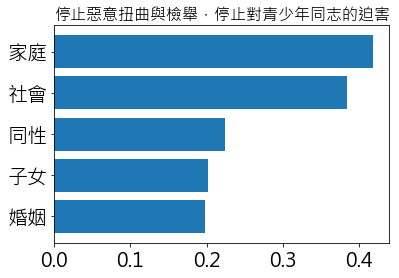

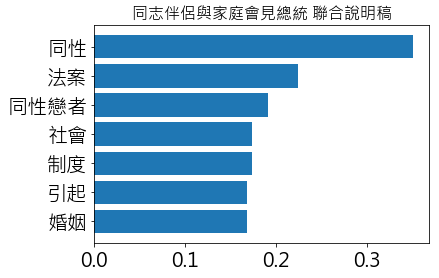

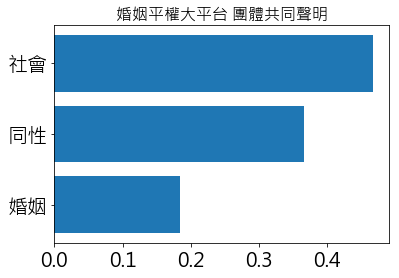

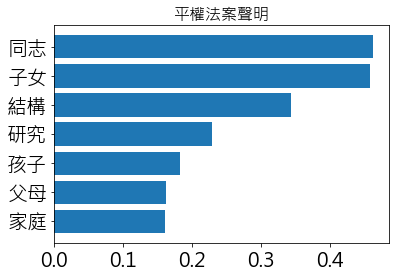

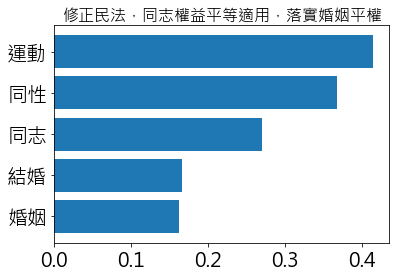

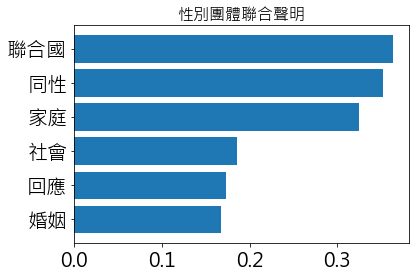

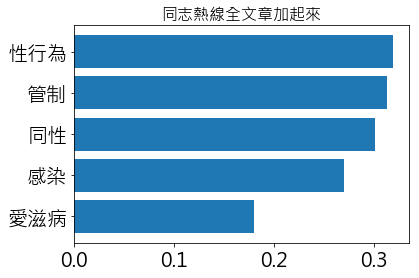

In [57]:

import matplotlib
from collections import OrderedDict
matplotlib.rcParams['font.sans-serif'] = 'Microsoft JhengHei'  #設定使用字體
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 


for i in range(len(doc)):
    d = {}
    for j in range(len(words)-1):
        if tfidf[i,j] > 0.16:
            d[words[j]] = tfidf[i,j]
    dd = OrderedDict(sorted(d.items(), key=lambda x: x[1]))   #常用字詞詞頻排序
    
    
    #畫橫式直方圖
    X = np.arange(len(d))
    plt.title(title[i], fontsize=16)
    plt.barh(X, dd.values(), align='center')
    plt.yticks(X, d.keys())
    plt.show()


## 觀察

## 「台灣同志諮詢熱線協會」的第二篇新聞稿是'同志伴侶與家庭會見總統 聯合說明稿'，經過TF-IDF分析，可以看出'平權'為最重要的字詞相對其他4個字，也相對於其他新聞稿，從該現象可以了解該團體與總統會面時，是以"平權"為主要訴求


## 「台灣同志諮詢熱線協會」所有新聞稿加總後的字頻視覺化

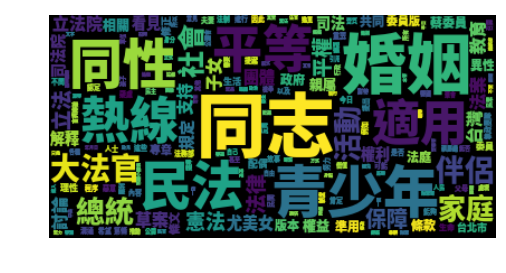

In [44]:
d = {}
for j in range(len(words)-1):
    d[words[j]] = tfidf[6,j]

font = r"D:/dsc-crawling-master/Session_B/data/NotoSansCJKtc-Black.otf"
wordcloud = WordCloud(font_path=font)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure( figsize=(8,6) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## 「下一代幸福聯盟」所有新聞稿最常使用的字詞
![如上分析結果圖](anti.png)

## 「台灣同志諮詢熱線協會」所有新聞稿最常使用的字詞
![如上分析結果圖](homosex.png)


## 觀察

* 「台灣同志諮詢熱線協會」在最近一年當中不斷的在做婚姻平權民法修法的倡議，所以可以看到使用度最高的為'民法'二字，比較特別的是'青少年'排行在最常使用的字詞中的第六名，可以推測該團體可能花蠻多心力在輔導迷惘的青少年探索與認識自己的性向。
* 「下一代幸福聯盟」所最常使用的字詞 '家庭'與'社會' 使用次數旗鼓相當，可見其對於社會上家庭的定義根深蒂固的想法，可能認為婚姻平權法案的通過會影響社會中家庭的組成，同時該團體可能也相當關注同性婚姻對於子女的影響，這一觀察可以從最常使用的第四個字詞看出來



* 從以上兩張常用字詞難以看出兩個對立團體之間其所主張價值的衝突關係，以主張婚姻平權的「台灣同志諮詢熱線協會」，來看與其對立反對多元成家的「下一代幸福聯盟」所最常使用的字詞，可以了解幸福盟想反對的可能是改變社會上一男一女婚姻及家庭的定義，與同性婚姻通過後對於子女的影響

